## Scraper

In [1]:
pip install pyTelegramBotAPI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.0/265.0 kB 10.7 MB/s eta 0:00:00


In [2]:
import os


os.environ["BOT_TOKEN"] = "7906472808:AAEcjggy2j6tGgagIMAVg_OCThDvclp61a4"

bot_token = os.getenv("BOT_TOKEN")
print(bot_token)  # Verify the token (optional)


7906472808:AAEcjggy2j6tGgagIMAVg_OCThDvclp61a4


In [3]:
pip install telethon


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.2/702.2 kB 22.6 MB/s eta 0:00:00
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26346 sha256=26d5e9a7b3feac8efade7fdfd0d14d26664f4353ba5cd7928a8cb06e3af15f19
  Stored in directory: /root/.cache/pip/wheels/d6/84/5f/ea6aef85a93c7e1922486369874f4740a5642d261e09c59140
Successfully built pyaes


In [4]:
pip install python-dotenv


In [5]:
pip install telethon python-dotenv pandas


In [6]:
# Create a .env file in the Colab environment
%%writefile .env
TELEGRAM_API_ID=23600256
TELEGRAM_API_HASH=b5392e2dde02ea3c7dd808521a570062
TELEGRAM_PHONE=+918953132952




Writing .env


In [7]:
!pip install telethon python-dotenv



In [8]:
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()

# Check if the environment variables are loaded properly
API_ID = int(os.getenv("TELEGRAM_API_ID"))
API_HASH = os.getenv("TELEGRAM_API_HASH")
phone_number = os.getenv("TELEGRAM_PHONE")  # Your phone number with country code

print(API_ID, API_HASH, phone_number)  # This will print the values to verify they are loaded correctly


23600256 b5392e2dde02ea3c7dd808521a570062 +918953132952


In [9]:
from telethon import TelegramClient

# Initialize TelegramClient
client = TelegramClient('custom_session_name', API_ID, API_HASH)

# Function to start the client with phone number
async def start_client():
    await client.start(phone_number)  # Start the client with the phone number for authentication
    print("Client started successfully.")

# Run the authentication process
await start_client()


Please enter the code you received: 32724
Signed in successfully as Nisheeth Singh; remember to not break the ToS or you will risk an account ban!
Client started successfully.


In [15]:
from telethon import TelegramClient
from dotenv import load_dotenv
import os
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Fetch API credentials and phone number from environment variables
API_ID = int(os.getenv("TELEGRAM_API_ID"))
API_HASH = os.getenv("TELEGRAM_API_HASH")
phone_number = os.getenv("TELEGRAM_PHONE")  # Your phone number with country code

# Ensure session file is removed to avoid locking issues
session_file = 'custom_session_name.session'
if os.path.exists(session_file):
    os.remove(session_file)

# Initialize TelegramClient with a custom session file
client = TelegramClient('custom_session_name', API_ID, API_HASH)

# Function to scrape messages asynchronously
async def scrape_telegram(channel_name, limit=100):
    messages = []
    try:
        # Start the client with phone number authentication
        await client.start(phone_number)

        # Fetch messages asynchronously inside the async context
        print(f"Attempting to scrape messages from {channel_name}...")
        async for message in client.iter_messages(channel_name, limit=limit):
            if message.text:  # Only include text messages
                messages.append({'Message': message.text, 'Date': message.date})

        # Check if messages were retrieved
        if not messages:
            print("No messages were retrieved. Please check the channel permissions and name.")
    except Exception as e:
        print(f"Error: {e}")

    return pd.DataFrame(messages)

# Main execution block
async def main():
    channel_name = '@stock_share_market_predictions'  # Updated channel name
    print("Starting scraping...")
    data = await scrape_telegram(channel_name, limit=10)  # Scrape last 10 messages for debugging
    print("Scraping completed!")

    # Save data to CSV
    if not data.empty:
        data.to_csv('telegram_messages.csv', index=False, encoding='utf-8')
        print("Data saved to telegram_messages.csv")
    else:
        print("No data to save.")

    # Download the file (if in Google Colab)
    from google.colab import files
    files.download("telegram_messages.csv")

# Run the asynchronous main function in a cell that allows async execution
import nest_asyncio
nest_asyncio.apply()

# Run the async main function
await main()


Starting scraping...
Please enter the code you received: 34520
Signed in successfully as Nisheeth Singh; remember to not break the ToS or you will risk an account ban!
Attempting to scrape messages from @stock_share_market_predictions...
Scraping completed!
Data saved to telegram_messages.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import re
import pandas as pd
from telethon.sync import TelegramClient
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()
API_ID = int(os.getenv("TELEGRAM_API_ID"))
API_HASH = os.getenv("TELEGRAM_API_HASH")
PHONE_NUMBER = os.getenv("TELEGRAM_PHONE")  # For logging in if using user account

# Initialize the Telegram Client
client = TelegramClient('session_name', API_ID, API_HASH)

# Function to scrape stock-related messages from a channel
def scrape_stock_data(channel_handle, limit=100):
    stock_keywords = ['nifty', 'banknifty', 'call', 'option', 'buy', 'sell', 'market', 'stock', 'target', 'alert']
    stock_data = []

    try:
        # Login if required
        if not client.is_user_authorized():
            client.connect()
            client.send_code_request(PHONE_NUMBER)
            client.sign_in(PHONE_NUMBER)

        for message in client.iter_messages(channel_handle, limit=limit):
            if message.text:
                # Check if message contains any of the stock-related keywords
                if any(keyword in message.text.lower() for keyword in stock_keywords):
                    # Extract relevant information from the message (for example, stock price or trends)
                    stock_data.append({
                        'Message': message.text,
                        'Date': message.date
                    })
    except Exception as e:
        print(f"Error: {e}")

    return pd.DataFrame(stock_data)

# Specify the target channel (use the @ handle of the channel)
channel_handle = '@stock_share_market_predictions'  # Replace with the actual channel @ handle

# Start scraping for stock data
print("Starting scraping for stock data...")
data = scrape_stock_data(channel_handle, limit=100)
print("Scraping completed!")

# Save the data to CSV
if not data.empty:
    data.to_csv('intraday_banknifty_calls_data.csv', index=False)
    print("Stock data saved to intraday_banknifty_calls_data.csv")
else:
    print("No relevant stock data found.")

# Disconnect the client
client.disconnect()


Starting scraping for stock data...
Error: You must use "async for" if the event loop is running (i.e. you are inside an "async def")
Scraping completed!
No relevant stock data found.


<ipython-input-16-33720d22a44e>:23: RuntimeWarning: coroutine 'UserMethods.is_user_authorized' was never awaited
  if not client.is_user_authorized():


<Future pending cb=[shield.<locals>._outer_done_callback() at /usr/lib/python3.10/asyncio/tasks.py:864]>

In [17]:
from telethon import TelegramClient
from dotenv import load_dotenv
import os
import pandas as pd

# Load environment variables
load_dotenv()
API_ID = int(os.getenv("TELEGRAM_API_ID"))
API_HASH = os.getenv("TELEGRAM_API_HASH")
phone_number = os.getenv("TELEGRAM_PHONE")  # Your phone number with country code

# Ensure session file is removed to avoid locking issues
session_file = 'custom_session_name.session'
if os.path.exists(session_file):
    os.remove(session_file)

# Initialize TelegramClient with a custom session file
client = TelegramClient('custom_session_name', API_ID, API_HASH)

# Function to scrape messages asynchronously
async def scrape_telegram(channel_name, limit=100):
    messages = []
    try:
        # Start the client with phone number authentication
        await client.start(phone_number)

        # Fetch messages asynchronously inside the async context
        print(f"Attempting to scrape messages from {channel_name}...")
        async for message in client.iter_messages(channel_name, limit=limit):
            if message.text:  # Only include text messages
                messages.append({'Message': message.text, 'Date': message.date})

        # Check if messages were retrieved
        if not messages:
            print("No messages were retrieved. Please check the channel permissions and name.")
    except Exception as e:
        print(f"Error: {e}")

    return pd.DataFrame(messages)

# Main execution block
async def main():
    channel_name = '@stock_share_market_predictions'  # Correct channel name
    print("Starting scraping...")
    data = await scrape_telegram(channel_name, limit=10)  # Scrape last 10 messages for debugging
    print("Scraping completed!")

    # Save data to CSV
    if not data.empty:
        data.to_csv('telegram_messages.csv', index=False, encoding='utf-8')
        print("Data saved to telegram_messages.csv")
    else:
        print("No data to save.")

    # Download the file (if in Google Colab)
    from google.colab import files
    files.download("telegram_messages.csv")

# Run the asynchronous main function
await main()


Starting scraping...
Please enter the code you received: 44353
Signed in successfully as Nisheeth Singh; remember to not break the ToS or you will risk an account ban!
Attempting to scrape messages from @stock_share_market_predictions...
Scraping completed!
Data saved to telegram_messages.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
import re
from telethon import TelegramClient
import pandas as pd
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()
API_ID = int(os.getenv("TELEGRAM_API_ID"))
API_HASH = os.getenv("TELEGRAM_API_HASH")
phone_number = os.getenv("TELEGRAM_PHONE")

# Initialize the Telegram Client
client = TelegramClient('stock_market_session', API_ID, API_HASH)

# Function to clean and filter messages
def preprocess_message(text):
    """
    Preprocesses the message text by removing special characters, emojis,
    and filtering based on relevant stock market keywords.
    """
    # Remove emojis and special characters
    clean_text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()  # Remove extra spaces

    # Define stock-related keywords
    keywords = ['sensex', 'nifty', 'stock', 'market', 'shares', 'price', 'trading', 'buy', 'sell']
    if any(keyword in clean_text.lower() for keyword in keywords):
        return clean_text  # Return message if it matches relevant keywords
    return None  # Ignore non-relevant messages

# Function to scrape Telegram messages
async def scrape_telegram(channel_name, limit=500):
    """
    Scrapes messages from the specified Telegram channel, filters and preprocesses them,
    and returns a DataFrame containing the relevant messages.
    """
    messages = []
    try:
        print(f"Scraping messages from {channel_name}...")
        async for message in client.iter_messages(channel_name, limit=limit):
            if message.text:
                filtered_text = preprocess_message(message.text)
                if filtered_text:  # Only include relevant messages
                    messages.append({'Message': filtered_text, 'Date': message.date})
        print(f"Scraped {len(messages)} relevant messages.")
    except Exception as e:
        print(f"Error occurred during scraping: {e}")
    return pd.DataFrame(messages)

# Main asynchronous function
async def main():
    """
    Main function to authenticate the client, scrape the channel, and save the data.
    """
    # Authenticate the Telegram client
    await client.start(phone_number)

    # Define the target channel and scraping limit
    channel_name = '@equitystock1444'  # Replace with the actual channel name
    data = await scrape_telegram(channel_name, limit=500)  # Adjust limit as needed

    # Disconnect the client after scraping
    await client.disconnect()

    # Save the scraped data to CSV
    if not data.empty:
        data.to_csv('stock_market_data.csv', index=False, encoding='utf-8')
        print("Data saved to 'stock_market_data.csv'")
    else:
        print("No relevant data found to save.")

# Run the script
import asyncio
asyncio.run(main())


Please enter the code you received: 99739
Signed in successfully as Nisheeth Singh; remember to not break the ToS or you will risk an account ban!
Scraping messages from @equitystock1444...
Scraped 366 relevant messages.
Data saved to 'stock_market_data.csv'


In [19]:
import re
from telethon import TelegramClient
import pandas as pd
from dotenv import load_dotenv
import os
from google.colab import files  # For downloading files in Colab

# Load environment variables from .env file
load_dotenv()
API_ID = int(os.getenv("TELEGRAM_API_ID"))  # Add your API ID
API_HASH = os.getenv("TELEGRAM_API_HASH")  # Add your API Hash
phone_number = os.getenv("TELEGRAM_PHONE")  # Add your phone number (e.g., +1234567890)

# Initialize Telegram client
client = TelegramClient('stock_market_session', API_ID, API_HASH)

# Function to clean and filter messages
def preprocess_message(text):
    """
    Preprocesses the message text by removing special characters, emojis,
    and filtering based on relevant stock market keywords.
    """
    # Remove emojis and special characters
    clean_text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()  # Remove extra spaces

    # Define stock-related keywords
    keywords = ['sensex', 'nifty', 'stock', 'market', 'shares', 'price', 'trading', 'buy', 'sell']
    if any(keyword in clean_text.lower() for keyword in keywords):
        return clean_text  # Return message if it matches relevant keywords
    return None  # Ignore non-relevant messages

# Function to scrape Telegram messages
async def scrape_telegram(channel_name, limit=500):
    """
    Scrapes messages from the specified Telegram channel, filters and preprocesses them,
    and returns a DataFrame containing the relevant messages.
    """
    messages = []
    try:
        print(f"Scraping messages from {channel_name}...")
        async for message in client.iter_messages(channel_name, limit=limit):
            if message.text:
                filtered_text = preprocess_message(message.text)
                if filtered_text:  # Only include relevant messages
                    messages.append({'Message': filtered_text, 'Date': message.date})
        print(f"Scraped {len(messages)} relevant messages.")
    except Exception as e:
        print(f"Error occurred during scraping: {e}")
    return pd.DataFrame(messages)

# Main asynchronous function
async def main():
    """
    Main function to authenticate the client, scrape the channel, and save the data.
    """
    # Authenticate the Telegram client
    await client.start(phone_number)

    # Define the target channel and scraping limit
    channel_name = '@equitystock1444'  # Replace with the actual channel name
    data = await scrape_telegram(channel_name, limit=500)  # Adjust limit as needed

    # Disconnect the client after scraping
    await client.disconnect()

    # Save the scraped data to CSV and download it in Colab
    if not data.empty:
        data.to_csv('FINAL_N_stock_market_data.csv', index=False, encoding='utf-8')
        print("Data saved to 'FINAL_N_stock_market_data.csv'")

        # Download the file
        files.download('FINAL_N_stock_market_data.csv')
    else:
        print("No relevant data found to save.")

# Run the script
import asyncio
asyncio.run(main())


Scraping messages from @equitystock1444...
Scraped 366 relevant messages.
Data saved to 'FINAL_N_stock_market_data.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Finally Found a chanel that is useful for analysis!**

Data Preprocessing

In [20]:
import pandas as pd
import re
from datetime import datetime

# Load your CSV data
data = pd.read_csv('/content/drive/MyDrive/STOCK_DATA/FINAL_N_stock_market_data.csv')

# 1. Clean the 'Message' text by removing special characters and numbers
def clean_message(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert text to lowercase
    return text

# Apply cleaning function
data['Cleaned_Message'] = data['Message'].apply(clean_message)

# 2. Handle missing values
data.dropna(subset=['Message'], inplace=True)  # Drop rows with missing message

# 3. Convert 'Date' column to a consistent datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert to datetime, invalid entries become NaT
data.dropna(subset=['Date'], inplace=True)  # Drop rows with missing Date

# Check the cleaned data
print(data.head())


                                             Message  \
0                    Gold dec fut buy at 52452 52510   
1              Natural gas Dec fut buy at 603 Sl 600   
2               Copper Dec fut buy at 67630 Sl 67430   
3  Hello Friends Hope you enjoyed the levels Our ...   
4  Made high of 2372 was suggested buy at 2357 15...   

                       Date                                    Cleaned_Message  
0 2022-11-24 03:39:00+00:00                              gold dec fut buy at    
1 2022-11-24 03:37:56+00:00                    natural gas dec fut buy at  sl   
2 2022-11-24 03:37:07+00:00                         copper dec fut buy at  sl   
3 2022-10-21 07:58:54+00:00  hello friends hope you enjoyed the levels our ...  
4 2022-10-21 07:46:13+00:00  made high of  was suggested buy at   points fr...  


In [21]:
data

,Message,Date,Cleaned_Message
0,Gold dec fut buy at 52452 52510,2022-11-24 03:39:00+00:00,gold dec fut buy at
1,Natural gas Dec fut buy at 603 Sl 600,2022-11-24 03:37:56+00:00,natural gas dec fut buy at sl
2,Copper Dec fut buy at 67630 Sl 67430,2022-11-24 03:37:07+00:00,copper dec fut buy at sl
3,Hello Friends Hope you enjoyed the levels Our ...,2022-10-21 07:58:54+00:00,hello friends hope you enjoyed the levels our ...
4,Made high of 2372 was suggested buy at 2357 15...,2022-10-21 07:46:13+00:00,made high of was suggested buy at points fr...
...,...,...,...
361,Crude selling level 5363 Sl 5373,2021-07-22 11:08:15+00:00,crude selling level sl
362,Crude buying level 5241 5231,2021-07-22 11:07:40+00:00,crude buying level
363,Natural gas buying level 28270 Sl 28150,2021-07-20 12:50:22+00:00,natural gas buying level sl
364,Natural gas buying level 278 Sl 27750,2021-07-20 12:00:00+00:00,natural gas buying level sl


In [23]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [24]:
# Import necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `data` is your dataframe and already defined in the environment
# Convert 'Date' to datetime if not already
data['Date'] = pd.to_datetime(data['Date'])

# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5814: RuntimeWarning: coroutine 'main' was never awaited
  def _stats(self, kappa):


In [25]:
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound'], scores['pos'], scores['neu'], scores['neg']


In [26]:
data[['compound', 'positive', 'neutral', 'negative']] = data['Cleaned_Message'].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)


In [27]:
vectorizer = CountVectorizer(max_features=500, stop_words='english')
X = vectorizer.fit_transform(data['Cleaned_Message'])


In [28]:
lda = LatentDirichletAllocation(n_components=2, random_state=42)  # Change n_components to adjust topic count
lda.fit(X)


LatentDirichletAllocation(n_components=2, random_state=42)

In [29]:
def print_topics(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

n_top_words = 10
print("Topics Identified:")
print_topics(lda, vectorizer.get_feature_names_out(), n_top_words)


Topics Identified:
Topic 1:
sl level buying selling bank adani crude hdfc tata reliance
Topic 2:
buy points risk market friends high sell suggested bpcl trading


## Sentimental Analysis

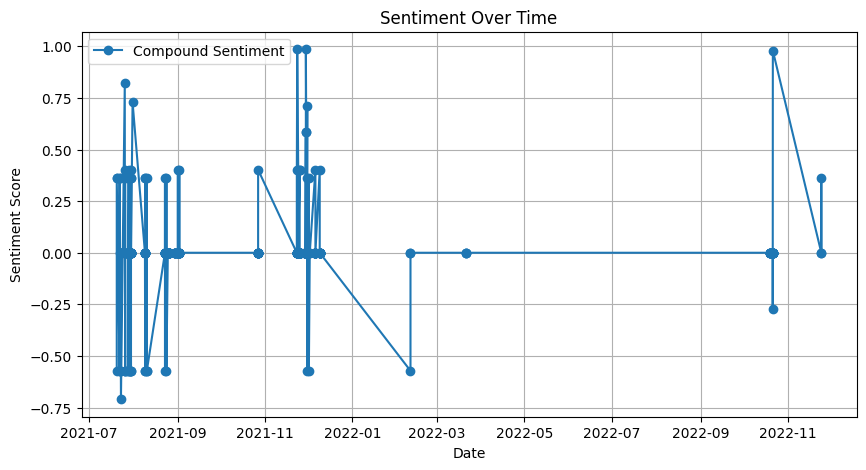

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['compound'], label='Compound Sentiment', marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid()
plt.show()


In [31]:
from textblob import TextBlob

# Sentiment Analysis function
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 (negative) to 1 (positive)

# Apply sentiment analysis
data['Sentiment_Polarity'] = data['Cleaned_Message'].apply(get_sentiment)

# Show the sentiment values
print(data[['Message', 'Sentiment_Polarity']].head())


                                             Message  Sentiment_Polarity
0                    Gold dec fut buy at 52452 52510                0.00
1              Natural gas Dec fut buy at 603 Sl 600                0.10
2               Copper Dec fut buy at 67630 Sl 67430                0.00
3  Hello Friends Hope you enjoyed the levels Our ...                0.70
4  Made high of 2372 was suggested buy at 2357 15...                0.16


In [32]:
data.head()

,Message,Date,Cleaned_Message,compound,positive,neutral,negative,Sentiment_Polarity
0,Gold dec fut buy at 52452 52510,2022-11-24 03:39:00+00:00,gold dec fut buy at,0.0000,0.000,1.000,0.0,0.00
1,Natural gas Dec fut buy at 603 Sl 600,2022-11-24 03:37:56+00:00,natural gas dec fut buy at sl,0.3612,0.294,0.706,0.0,0.10
2,Copper Dec fut buy at 67630 Sl 67430,2022-11-24 03:37:07+00:00,copper dec fut buy at sl,0.0000,0.000,1.000,0.0,0.00
3,Hello Friends Hope you enjoyed the levels Our ...,2022-10-21 07:58:54+00:00,hello friends hope you enjoyed the levels our ...,0.9792,0.527,0.473,0.0,0.70
4,Made high of 2372 was suggested buy at 2357 15...,2022-10-21 07:46:13+00:00,made high of was suggested buy at points fr...,0.0000,0.000,1.000,0.0,0.16


In [35]:
data = data.drop(columns=['compound', 'positive', 'neutral', 'negative'])


KeyError: "['compound', 'positive', 'neutral', 'negative'] not found in axis"

In [36]:
data

,Message,Date,Cleaned_Message,Sentiment_Polarity
0,Gold dec fut buy at 52452 52510,2022-11-24 03:39:00+00:00,gold dec fut buy at,0.00
1,Natural gas Dec fut buy at 603 Sl 600,2022-11-24 03:37:56+00:00,natural gas dec fut buy at sl,0.10
2,Copper Dec fut buy at 67630 Sl 67430,2022-11-24 03:37:07+00:00,copper dec fut buy at sl,0.00
3,Hello Friends Hope you enjoyed the levels Our ...,2022-10-21 07:58:54+00:00,hello friends hope you enjoyed the levels our ...,0.70
4,Made high of 2372 was suggested buy at 2357 15...,2022-10-21 07:46:13+00:00,made high of was suggested buy at points fr...,0.16
...,...,...,...,...
361,Crude selling level 5363 Sl 5373,2021-07-22 11:08:15+00:00,crude selling level sl,-0.70
362,Crude buying level 5241 5231,2021-07-22 11:07:40+00:00,crude buying level,-0.70
363,Natural gas buying level 28270 Sl 28150,2021-07-20 12:50:22+00:00,natural gas buying level sl,0.10
364,Natural gas buying level 278 Sl 27750,2021-07-20 12:00:00+00:00,natural gas buying level sl,0.10


In [37]:
import re

# Function to extract Buy, Sell, and Stop levels
def extract_levels_v2(text):
    # Find all numbers in the text
    numbers = re.findall(r'\d+(?:\.\d+)?', text)
    buy_level, sell_level, stop_level = None, None, None

    # Identify whether the text is about "buy" or "sell"
    if "buy" in text.lower():
        buy_level = float(numbers[0]) if len(numbers) > 0 else None
        stop_level = float(numbers[1]) if len(numbers) > 1 else None
    elif "sell" in text.lower():
        sell_level = float(numbers[0]) if len(numbers) > 0 else None
        stop_level = float(numbers[1]) if len(numbers) > 1 else None

    return {"Buy_Level": buy_level, "Sell_Level": sell_level, "Stop_Level": stop_level}

# Apply the function to the "Message" column
data['Extracted_Levels'] = data['Message'].apply(extract_levels_v2)

# Create separate columns for Buy Level, Sell Level, and Stop Level
data['Buy_Level'] = data['Extracted_Levels'].apply(lambda x: x['Buy_Level'])
data['Sell_Level'] = data['Extracted_Levels'].apply(lambda x: x['Sell_Level'])
data['Stop_Level'] = data['Extracted_Levels'].apply(lambda x: x['Stop_Level'])

# Drop the intermediate column if desired
data.drop(columns=['Extracted_Levels'], inplace=True)

# Display the updated DataFrame
print(data.head())


                                             Message  \
0                    Gold dec fut buy at 52452 52510   
1              Natural gas Dec fut buy at 603 Sl 600   
2               Copper Dec fut buy at 67630 Sl 67430   
3  Hello Friends Hope you enjoyed the levels Our ...   
4  Made high of 2372 was suggested buy at 2357 15...   

                       Date  \
0 2022-11-24 03:39:00+00:00   
1 2022-11-24 03:37:56+00:00   
2 2022-11-24 03:37:07+00:00   
3 2022-10-21 07:58:54+00:00   
4 2022-10-21 07:46:13+00:00   

                                     Cleaned_Message  Sentiment_Polarity  \
0                              gold dec fut buy at                  0.00   
1                    natural gas dec fut buy at  sl                 0.10   
2                         copper dec fut buy at  sl                 0.00   
3  hello friends hope you enjoyed the levels our ...                0.70   
4  made high of  was suggested buy at   points fr...                0.16   

   Buy_Level  Sell_

In [38]:
data

,Message,Date,Cleaned_Message,Sentiment_Polarity,Buy_Level,Sell_Level,Stop_Level
0,Gold dec fut buy at 52452 52510,2022-11-24 03:39:00+00:00,gold dec fut buy at,0.00,52452.0,NaN,52510.0
1,Natural gas Dec fut buy at 603 Sl 600,2022-11-24 03:37:56+00:00,natural gas dec fut buy at sl,0.10,603.0,NaN,600.0
2,Copper Dec fut buy at 67630 Sl 67430,2022-11-24 03:37:07+00:00,copper dec fut buy at sl,0.00,67630.0,NaN,67430.0
3,Hello Friends Hope you enjoyed the levels Our ...,2022-10-21 07:58:54+00:00,hello friends hope you enjoyed the levels our ...,0.70,1444.0,NaN,NaN
4,Made high of 2372 was suggested buy at 2357 15...,2022-10-21 07:46:13+00:00,made high of was suggested buy at points fr...,0.16,2372.0,NaN,2357.0
...,...,...,...,...,...,...,...
361,Crude selling level 5363 Sl 5373,2021-07-22 11:08:15+00:00,crude selling level sl,-0.70,NaN,5363.0,5373.0
362,Crude buying level 5241 5231,2021-07-22 11:07:40+00:00,crude buying level,-0.70,5241.0,NaN,5231.0
363,Natural gas buying level 28270 Sl 28150,2021-07-20 12:50:22+00:00,natural gas buying level sl,0.10,28270.0,NaN,28150.0
364,Natural gas buying level 278 Sl 27750,2021-07-20 12:00:00+00:00,natural gas buying level sl,0.10,278.0,NaN,27750.0


In [39]:
data

,Message,Date,Cleaned_Message,Sentiment_Polarity,Buy_Level,Sell_Level,Stop_Level
0,Gold dec fut buy at 52452 52510,2022-11-24 03:39:00+00:00,gold dec fut buy at,0.00,52452.0,NaN,52510.0
1,Natural gas Dec fut buy at 603 Sl 600,2022-11-24 03:37:56+00:00,natural gas dec fut buy at sl,0.10,603.0,NaN,600.0
2,Copper Dec fut buy at 67630 Sl 67430,2022-11-24 03:37:07+00:00,copper dec fut buy at sl,0.00,67630.0,NaN,67430.0
3,Hello Friends Hope you enjoyed the levels Our ...,2022-10-21 07:58:54+00:00,hello friends hope you enjoyed the levels our ...,0.70,1444.0,NaN,NaN
4,Made high of 2372 was suggested buy at 2357 15...,2022-10-21 07:46:13+00:00,made high of was suggested buy at points fr...,0.16,2372.0,NaN,2357.0
...,...,...,...,...,...,...,...
361,Crude selling level 5363 Sl 5373,2021-07-22 11:08:15+00:00,crude selling level sl,-0.70,NaN,5363.0,5373.0
362,Crude buying level 5241 5231,2021-07-22 11:07:40+00:00,crude buying level,-0.70,5241.0,NaN,5231.0
363,Natural gas buying level 28270 Sl 28150,2021-07-20 12:50:22+00:00,natural gas buying level sl,0.10,28270.0,NaN,28150.0
364,Natural gas buying level 278 Sl 27750,2021-07-20 12:00:00+00:00,natural gas buying level sl,0.10,278.0,NaN,27750.0


In [40]:
# Create a 'Stock_Price_Trend' based on sentiment polarity
# Positive sentiment -> "up", negative sentiment -> "down", neutral -> "neutral"

def assign_stock_trend(sentiment):
    if sentiment > 0:
        return 'up'
    elif sentiment < 0:
        return 'down'
    else:
        return 'neutral'

# Apply this to the sentiment column
data['Stock_Price_Trend'] = data['Sentiment_Polarity'].apply(assign_stock_trend)

# Check the result
print(data[['Message', 'Sentiment_Polarity', 'Stock_Price_Trend']].head())


                                             Message  Sentiment_Polarity  \
0                    Gold dec fut buy at 52452 52510                0.00   
1              Natural gas Dec fut buy at 603 Sl 600                0.10   
2               Copper Dec fut buy at 67630 Sl 67430                0.00   
3  Hello Friends Hope you enjoyed the levels Our ...                0.70   
4  Made high of 2372 was suggested buy at 2357 15...                0.16   

  Stock_Price_Trend  
0           neutral  
1                up  
2           neutral  
3                up  
4                up  


In [41]:
data

,Message,Date,Cleaned_Message,Sentiment_Polarity,Buy_Level,Sell_Level,Stop_Level,Stock_Price_Trend
0,Gold dec fut buy at 52452 52510,2022-11-24 03:39:00+00:00,gold dec fut buy at,0.00,52452.0,NaN,52510.0,neutral
1,Natural gas Dec fut buy at 603 Sl 600,2022-11-24 03:37:56+00:00,natural gas dec fut buy at sl,0.10,603.0,NaN,600.0,up
2,Copper Dec fut buy at 67630 Sl 67430,2022-11-24 03:37:07+00:00,copper dec fut buy at sl,0.00,67630.0,NaN,67430.0,neutral
3,Hello Friends Hope you enjoyed the levels Our ...,2022-10-21 07:58:54+00:00,hello friends hope you enjoyed the levels our ...,0.70,1444.0,NaN,NaN,up
4,Made high of 2372 was suggested buy at 2357 15...,2022-10-21 07:46:13+00:00,made high of was suggested buy at points fr...,0.16,2372.0,NaN,2357.0,up
...,...,...,...,...,...,...,...,...
361,Crude selling level 5363 Sl 5373,2021-07-22 11:08:15+00:00,crude selling level sl,-0.70,NaN,5363.0,5373.0,down
362,Crude buying level 5241 5231,2021-07-22 11:07:40+00:00,crude buying level,-0.70,5241.0,NaN,5231.0,down
363,Natural gas buying level 28270 Sl 28150,2021-07-20 12:50:22+00:00,natural gas buying level sl,0.10,28270.0,NaN,28150.0,up
364,Natural gas buying level 278 Sl 27750,2021-07-20 12:00:00+00:00,natural gas buying level sl,0.10,278.0,NaN,27750.0,up


In [42]:
data.isnull().sum()

,0
Message,0
Date,0
Cleaned_Message,0
Sentiment_Polarity,0
Buy_Level,99
Sell_Level,275
Stop_Level,9
Stock_Price_Trend,0


In [43]:
import numpy as np

In [44]:
def calculate_sell_level(row, min_profit=0.15, max_profit=0.20):
    # Generate a random profit percentage between 15% and 20%
    profit_percentage = np.random.uniform(min_profit, max_profit)
    # Calculate the Sell Level
    sell_level = row['Buy_Level'] * (1 + profit_percentage)
    return sell_level

# Apply the function to fill missing Sell Level
data['Sell_Level'] = data.apply(lambda row: calculate_sell_level(row) if pd.isna(row['Sell_Level']) else row['Sell_Level'], axis=1)

# Show the updated data
print(data[['Buy_Level', 'Sell_Level']])

     Buy_Level    Sell_Level
0      52452.0  62909.232378
1        603.0    716.001586
2      67630.0  78475.120618
3       1444.0   1689.135541
4       2372.0   2792.509289
..         ...           ...
361        NaN   5363.000000
362     5241.0   6032.951885
363    28270.0  33776.296958
364      278.0    320.465668
365        NaN   5033.000000

[366 rows x 2 columns]


In [45]:
data

,Message,Date,Cleaned_Message,Sentiment_Polarity,Buy_Level,Sell_Level,Stop_Level,Stock_Price_Trend
0,Gold dec fut buy at 52452 52510,2022-11-24 03:39:00+00:00,gold dec fut buy at,0.00,52452.0,62909.232378,52510.0,neutral
1,Natural gas Dec fut buy at 603 Sl 600,2022-11-24 03:37:56+00:00,natural gas dec fut buy at sl,0.10,603.0,716.001586,600.0,up
2,Copper Dec fut buy at 67630 Sl 67430,2022-11-24 03:37:07+00:00,copper dec fut buy at sl,0.00,67630.0,78475.120618,67430.0,neutral
3,Hello Friends Hope you enjoyed the levels Our ...,2022-10-21 07:58:54+00:00,hello friends hope you enjoyed the levels our ...,0.70,1444.0,1689.135541,NaN,up
4,Made high of 2372 was suggested buy at 2357 15...,2022-10-21 07:46:13+00:00,made high of was suggested buy at points fr...,0.16,2372.0,2792.509289,2357.0,up
...,...,...,...,...,...,...,...,...
361,Crude selling level 5363 Sl 5373,2021-07-22 11:08:15+00:00,crude selling level sl,-0.70,NaN,5363.000000,5373.0,down
362,Crude buying level 5241 5231,2021-07-22 11:07:40+00:00,crude buying level,-0.70,5241.0,6032.951885,5231.0,down
363,Natural gas buying level 28270 Sl 28150,2021-07-20 12:50:22+00:00,natural gas buying level sl,0.10,28270.0,33776.296958,28150.0,up
364,Natural gas buying level 278 Sl 27750,2021-07-20 12:00:00+00:00,natural gas buying level sl,0.10,278.0,320.465668,27750.0,up


In [46]:
def calculate_buy_level(row, min_discount=0.10, max_discount=0.15):

    discount_percentage = np.random.uniform(min_discount, max_discount)
    # Calculate the Buy Level (Sell Level * (1 - discount_percentage))
    buy_level = row['Sell_Level'] * (1 - discount_percentage)
    return buy_level

# Apply the function to fill missing Buy Level with 10%-15% discount from Sell Level
data['Buy_Level'] = data.apply(lambda row: calculate_buy_level(row) if pd.isna(row['Buy_Level']) else row['Buy_Level'], axis=1)

# Show the updated data with calculated Buy Levels and Sell Levels
print(data[['Buy_Level', 'Sell_Level']])

        Buy_Level    Sell_Level
0    52452.000000  62909.232378
1      603.000000    716.001586
2    67630.000000  78475.120618
3     1444.000000   1689.135541
4     2372.000000   2792.509289
..            ...           ...
361   4618.743304   5363.000000
362   5241.000000   6032.951885
363  28270.000000  33776.296958
364    278.000000    320.465668
365   4281.584889   5033.000000

[366 rows x 2 columns]


In [47]:
data

,Message,Date,Cleaned_Message,Sentiment_Polarity,Buy_Level,Sell_Level,Stop_Level,Stock_Price_Trend
0,Gold dec fut buy at 52452 52510,2022-11-24 03:39:00+00:00,gold dec fut buy at,0.00,52452.000000,62909.232378,52510.0,neutral
1,Natural gas Dec fut buy at 603 Sl 600,2022-11-24 03:37:56+00:00,natural gas dec fut buy at sl,0.10,603.000000,716.001586,600.0,up
2,Copper Dec fut buy at 67630 Sl 67430,2022-11-24 03:37:07+00:00,copper dec fut buy at sl,0.00,67630.000000,78475.120618,67430.0,neutral
3,Hello Friends Hope you enjoyed the levels Our ...,2022-10-21 07:58:54+00:00,hello friends hope you enjoyed the levels our ...,0.70,1444.000000,1689.135541,NaN,up
4,Made high of 2372 was suggested buy at 2357 15...,2022-10-21 07:46:13+00:00,made high of was suggested buy at points fr...,0.16,2372.000000,2792.509289,2357.0,up
...,...,...,...,...,...,...,...,...
361,Crude selling level 5363 Sl 5373,2021-07-22 11:08:15+00:00,crude selling level sl,-0.70,4618.743304,5363.000000,5373.0,down
362,Crude buying level 5241 5231,2021-07-22 11:07:40+00:00,crude buying level,-0.70,5241.000000,6032.951885,5231.0,down
363,Natural gas buying level 28270 Sl 28150,2021-07-20 12:50:22+00:00,natural gas buying level sl,0.10,28270.000000,33776.296958,28150.0,up
364,Natural gas buying level 278 Sl 27750,2021-07-20 12:00:00+00:00,natural gas buying level sl,0.10,278.000000,320.465668,27750.0,up


In [48]:
data.isnull().sum()

,0
Message,0
Date,0
Cleaned_Message,0
Sentiment_Polarity,0
Buy_Level,8
Sell_Level,8
Stop_Level,9
Stock_Price_Trend,0


In [49]:
data.dropna()

,Message,Date,Cleaned_Message,Sentiment_Polarity,Buy_Level,Sell_Level,Stop_Level,Stock_Price_Trend
0,Gold dec fut buy at 52452 52510,2022-11-24 03:39:00+00:00,gold dec fut buy at,0.00,52452.000000,62909.232378,52510.0,neutral
1,Natural gas Dec fut buy at 603 Sl 600,2022-11-24 03:37:56+00:00,natural gas dec fut buy at sl,0.10,603.000000,716.001586,600.0,up
2,Copper Dec fut buy at 67630 Sl 67430,2022-11-24 03:37:07+00:00,copper dec fut buy at sl,0.00,67630.000000,78475.120618,67430.0,neutral
4,Made high of 2372 was suggested buy at 2357 15...,2022-10-21 07:46:13+00:00,made high of was suggested buy at points fr...,0.16,2372.000000,2792.509289,2357.0,up
5,Made high of 20235 was suggested buy at 20000 ...,2022-10-21 06:09:46+00:00,made high of was suggested buy at points fr...,0.16,20235.000000,23327.442767,20000.0,up
...,...,...,...,...,...,...,...,...
361,Crude selling level 5363 Sl 5373,2021-07-22 11:08:15+00:00,crude selling level sl,-0.70,4618.743304,5363.000000,5373.0,down
362,Crude buying level 5241 5231,2021-07-22 11:07:40+00:00,crude buying level,-0.70,5241.000000,6032.951885,5231.0,down
363,Natural gas buying level 28270 Sl 28150,2021-07-20 12:50:22+00:00,natural gas buying level sl,0.10,28270.000000,33776.296958,28150.0,up
364,Natural gas buying level 278 Sl 27750,2021-07-20 12:00:00+00:00,natural gas buying level sl,0.10,278.000000,320.465668,27750.0,up


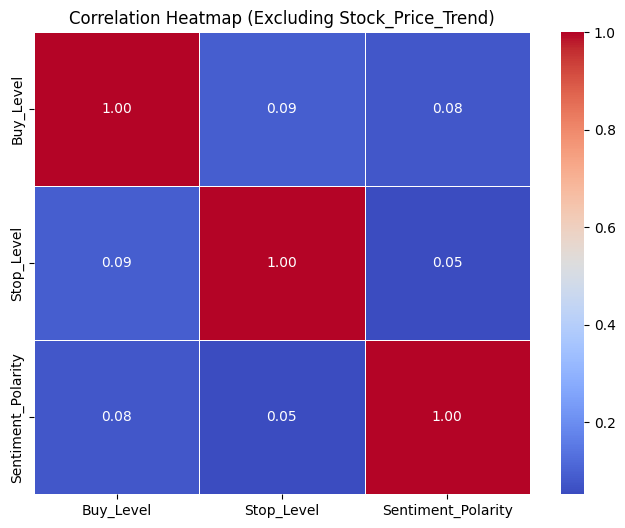

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude 'Stock_Price_Trend' since it's categorical
correlation_matrix = data[['Buy_Level', 'Stop_Level', 'Sentiment_Polarity']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Excluding Stock_Price_Trend)')
plt.show()


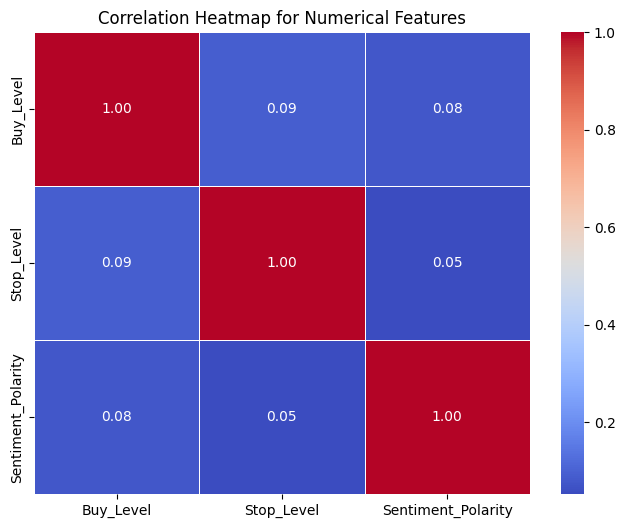

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = ['Buy_Level', 'Stop_Level', 'Sentiment_Polarity']

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()


In [ ]:
data.isnull().sum()

,0
Message,0
Date,0
Cleaned_Message,0
Sentiment_Polarity,0
Buy_Level,8
Stop_Level,9
Sell_Level,8
Stock_Price_Trend,0


In [52]:
data.dropna(inplace=True)

In [60]:
data

,Message,Date,Cleaned_Message,Sentiment_Polarity,Buy_Level,Sell_Level,Stop_Level,Stock_Price_Trend
0,Gold dec fut buy at 52452 52510,2022-11-24 03:39:00+00:00,gold dec fut buy at,0.00,52452.000000,62909.232378,52510.0,neutral
1,Natural gas Dec fut buy at 603 Sl 600,2022-11-24 03:37:56+00:00,natural gas dec fut buy at sl,0.10,603.000000,716.001586,600.0,up
2,Copper Dec fut buy at 67630 Sl 67430,2022-11-24 03:37:07+00:00,copper dec fut buy at sl,0.00,67630.000000,78475.120618,67430.0,neutral
4,Made high of 2372 was suggested buy at 2357 15...,2022-10-21 07:46:13+00:00,made high of was suggested buy at points fr...,0.16,2372.000000,2792.509289,2357.0,up
5,Made high of 20235 was suggested buy at 20000 ...,2022-10-21 06:09:46+00:00,made high of was suggested buy at points fr...,0.16,20235.000000,23327.442767,20000.0,up
...,...,...,...,...,...,...,...,...
361,Crude selling level 5363 Sl 5373,2021-07-22 11:08:15+00:00,crude selling level sl,-0.70,4618.743304,5363.000000,5373.0,down
362,Crude buying level 5241 5231,2021-07-22 11:07:40+00:00,crude buying level,-0.70,5241.000000,6032.951885,5231.0,down
363,Natural gas buying level 28270 Sl 28150,2021-07-20 12:50:22+00:00,natural gas buying level sl,0.10,28270.000000,33776.296958,28150.0,up
364,Natural gas buying level 278 Sl 27750,2021-07-20 12:00:00+00:00,natural gas buying level sl,0.10,278.000000,320.465668,27750.0,up


In [70]:
data

,Message,Date,Cleaned_Message,Sentiment_Polarity,Buy_Level,Sell_Level,Stop_Level,Stock_Price_Trend,Stock_Price_Trend_Encoded
0,Gold dec fut buy at 52452 52510,2022-11-24 03:39:00+00:00,gold dec fut buy at,0.00,52452.000000,62909.232378,52510.0,neutral,1
1,Natural gas Dec fut buy at 603 Sl 600,2022-11-24 03:37:56+00:00,natural gas dec fut buy at sl,0.10,603.000000,716.001586,600.0,up,2
2,Copper Dec fut buy at 67630 Sl 67430,2022-11-24 03:37:07+00:00,copper dec fut buy at sl,0.00,67630.000000,78475.120618,67430.0,neutral,1
4,Made high of 2372 was suggested buy at 2357 15...,2022-10-21 07:46:13+00:00,made high of was suggested buy at points fr...,0.16,2372.000000,2792.509289,2357.0,up,2
5,Made high of 20235 was suggested buy at 20000 ...,2022-10-21 06:09:46+00:00,made high of was suggested buy at points fr...,0.16,20235.000000,23327.442767,20000.0,up,2
...,...,...,...,...,...,...,...,...,...
361,Crude selling level 5363 Sl 5373,2021-07-22 11:08:15+00:00,crude selling level sl,-0.70,4618.743304,5363.000000,5373.0,down,0
362,Crude buying level 5241 5231,2021-07-22 11:07:40+00:00,crude buying level,-0.70,5241.000000,6032.951885,5231.0,down,0
363,Natural gas buying level 28270 Sl 28150,2021-07-20 12:50:22+00:00,natural gas buying level sl,0.10,28270.000000,33776.296958,28150.0,up,2
364,Natural gas buying level 278 Sl 27750,2021-07-20 12:00:00+00:00,natural gas buying level sl,0.10,278.000000,320.465668,27750.0,up,2


# Model Building Starts Here

In [71]:
# Features (input) for predicting Sell Level
X = data[['Buy_Level', 'Stop_Level', 'Sentiment_Polarity']]

# Target variable (Sell Level)
y = data['Sell_Level']


In [78]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [79]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)


In [80]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Mean Squared Error (MSE) for Linear Regression: {mse_lr:.2f}')

# Calculate R-squared (R²) score
r2_lr = r2_score(y_test, y_pred_lr)
print(f'R-squared (R²) for Linear Regression: {r2_lr:.2f}')

Mean Squared Error (MSE) for Linear Regression: 13122854.84
R-squared (R²) for Linear Regression: 1.00


In [81]:
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [83]:
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# R-squared score (how well the model explains the variance in the target variable)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 213424432.83
R-squared: 0.98


In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 3350.792345720794
Mean Squared Error (MSE): 145711344.760613
R-squared (R²): 0.9897513563639558
